In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

In [4]:
df = pd.read_excel('finaccess.xls')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8669 entries, 0 to 8668
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Residence       8669 non-null   int64 
 1   Household Size  8669 non-null   int64 
 2   Resp            8669 non-null   int64 
 3   Age             8669 non-null   int64 
 4   Education       8669 non-null   int64 
 5   Marital         8669 non-null   int64 
 6   Income          8669 non-null   int64 
 7   Save_Micro      8669 non-null   int64 
 8   Sav_Mobank      8669 non-null   int64 
 9   Sav_Mob         8669 non-null   int64 
 10  Sav_Coop        8669 non-null   int64 
 11  Save_Chama      8669 non-null   int64 
 12  Sav_Friends     8669 non-null   int64 
 13  Sav_FamKeep     8669 non-null   int64 
 14  Sav_Secret      8669 non-null   int64 
 15  Mob_M1y         8669 non-null   int64 
 16  Mob_Bank        8669 non-null   int64 
 17  Loan_Bank       8669 non-null   int64 
 18  Loan_Mob

In [6]:
df.describe()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,...,Fuel_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,House_0ship
count,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,...,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000
mean,0.416542,3.974276,0.577460,39.293690,2.493136,2.025955,3.050179,0.040028,0.316530,0.855116,...,1.782212,4.134964,2.951898,0.533049,0.561656,0.523474,0.578383,0.714154,0.579306,1.112008
std,0.493014,2.321904,0.493992,17.103637,2.015023,1.291463,3.168386,0.258477,0.695878,0.966085,...,2.434723,3.173460,1.435385,0.498935,0.496213,0.499477,0.493846,0.451843,0.519212,1.532235
min,0.000000,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,1.000000,35.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,5.000000,1.000000,50.000000,4.000000,3.000000,7.000000,0.000000,0.000000,2.000000,...,5.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
max,1.000000,21.000000,1.000000,95.000000,10.000000,10.000000,11.000000,2.000000,2.000000,2.000000,...,10.000000,11.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000


In [7]:
df.head()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,...,Light_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,House_0ship
0,0,6,0,49,2,3,0,0,2,2,...,3,7,4,1,0,0,0,0,0,5
1,0,7,0,43,2,3,1,0,0,2,...,0,7,3,0,0,0,0,0,0,1
2,0,5,0,55,1,3,0,0,0,2,...,3,7,4,1,0,1,1,0,1,0
3,0,12,1,55,0,3,0,0,0,0,...,2,1,4,1,1,1,0,1,1,0
4,0,4,0,63,0,3,7,0,0,0,...,3,7,0,0,0,0,0,0,0,1


In [8]:
df.drop(['Light_Type'], axis=1, inplace=True)
df.isnull().sum()


Residence         0
Household Size    0
Resp              0
Age               0
Education         0
                 ..
Banana            0
Towels            0
Flask             0
Own_Land          0
House_0ship       0
Length: 71, dtype: int64

# Data Analysis

In [9]:
print(df['Age'].describe())


count    8669.000000
mean       39.293690
std        17.103637
min        16.000000
25%        26.000000
50%        35.000000
75%        50.000000
max        95.000000
Name: Age, dtype: float64


C:\Users\tsigauke\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


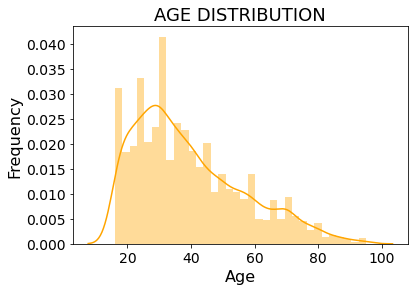

In [10]:
sns.distplot(df['Age'],color = 'orange')
plt.title('AGE DISTRIBUTION', fontsize = 18)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

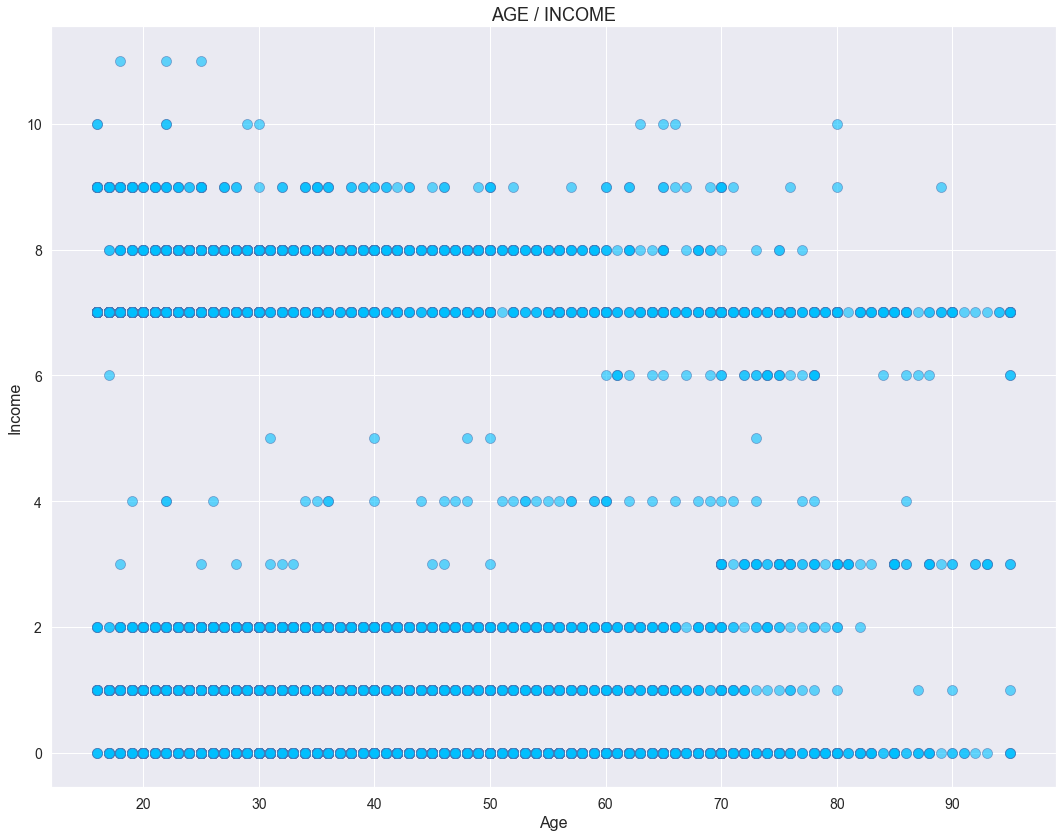

In [11]:
# Age vs Income
sns.set(rc={"figure.figsize":(18, 14)})
sns.scatterplot(data=df,x='Age', y='Income', color = 'deepskyblue',  s = 100,   alpha = 0.6, edgecolor = 'b', legend="full")
plt.title('AGE / INCOME', fontsize = 18)
plt.xlabel('Age',  fontsize = 16)
plt.ylabel('Income', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


No handles with labels found to put in legend.


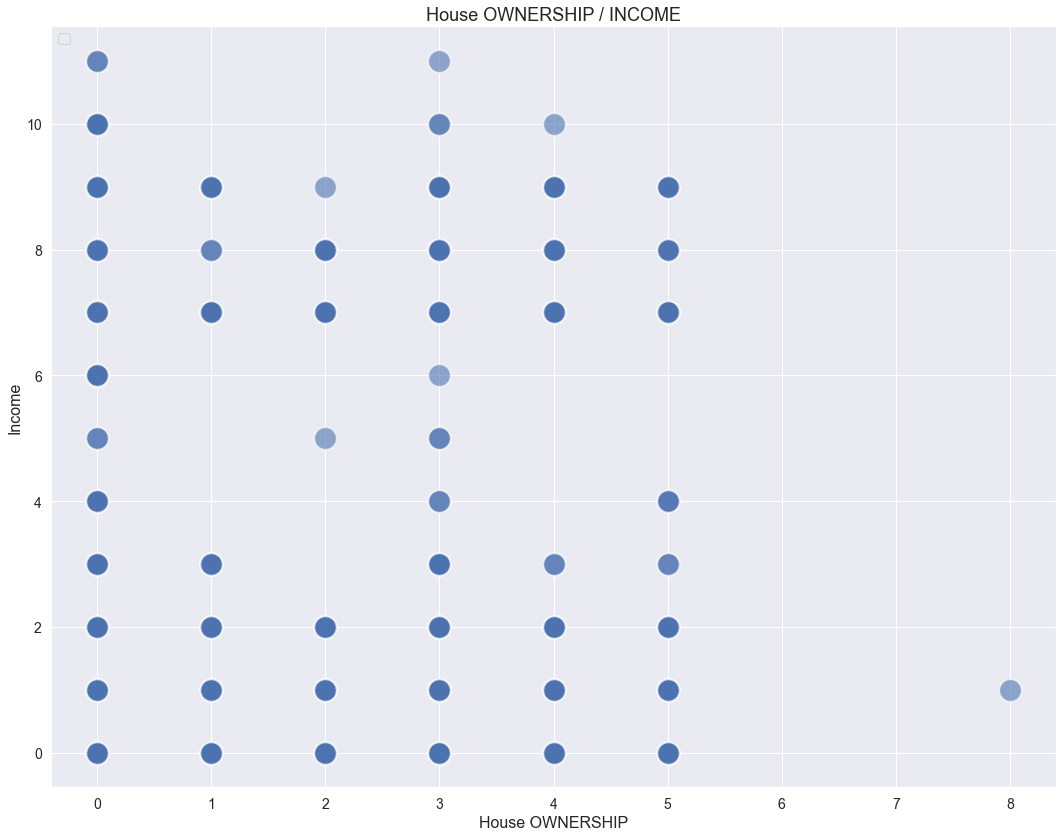

In [12]:
sns.scatterplot(x='House_0ship',y= 'Income', data = df, s = 500,  alpha = 0.6, edgecolor = 'white', palette = 'spring')
plt.title('House OWNERSHIP / INCOME', fontsize = 18)
plt.xlabel('House OWNERSHIP', fontsize = 16)
plt.ylabel('Income', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

# Data Processing

In [13]:
# DATA PROCESSING

X = df.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(('Cluster data samples : '), cluster_data[:5])

Cluster data samples :  [[-0.84493701  0.87249105 -1.16903352  0.56753248 -0.24474403  0.754262
  -0.9627473  -0.15486893  2.41934347  1.18514385 -0.35845158  1.56298416
  -0.33251248 -0.26585106 -0.6427513   0.597965    1.98065291 -0.23015985
   1.49164455 -0.23912275 -0.12074698 -0.08815731  3.23320168 -0.13903877
  -0.14053485 -0.41140745 -0.20090797 -0.7926993  -0.29540615 -0.12006074
  -0.12155451 -0.07873845 -0.03910336 -0.13115227 -0.13283373 -0.26630429
   2.13376837 -0.06273496 -0.47802661 -0.06468837 -0.17647954 -0.03835886
  -0.03792121 -0.13367012 -0.03524621 -0.05124035 -0.0405425  -0.60232019
  -0.13847495 -0.09272945 -0.07462243 -0.08316025 -0.35509076 -0.10270941
  -0.02345054 -0.02950161 -0.0592394  -0.03941159  0.20077097 -1.00242537
  -1.04106445 -0.73204036  0.90286373  0.73023119  0.93594918 -1.1319522
  -1.04810465 -1.17124695 -1.58062829 -1.11580468  2.53761109]
 [-0.84493701  1.30319687 -1.16903352  0.21670967 -0.24474403  0.754262
  -0.64711095 -0.15486893 -0.4

# Modeling Using Kmeans Algorithim

In [14]:
# MODELING

clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print((labels[:100]))

[2 2 2 2 0 2 0 0 2 2 0 2 0 2 2 0 2 0 2 0 0 0 0 0 2 0 2 0 2 0 0 1 2 1 0 1 2
 2 2 2 2 2 1 1 2 1 0 2 0 0 0 2 0 2 1 2 0 2 2 2 2 0 1 0 2 2 0 1 0 0 1 2 2 2
 0 0 2 2 2 2 0 2 2 1 1 0 1 1 0 1 0 1 0 1 1 2 2 0 1 2]


In [15]:
df['cluster_num'] = labels
df.head()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,...,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,House_0ship,cluster_num
0,0,6,0,49,2,3,0,0,2,2,...,7,4,1,0,0,0,0,0,5,2
1,0,7,0,43,2,3,1,0,0,2,...,7,3,0,0,0,0,0,0,1,2
2,0,5,0,55,1,3,0,0,0,2,...,7,4,1,0,1,1,0,1,0,2
3,0,12,1,55,0,3,0,0,0,0,...,1,4,1,1,1,0,1,1,0,2
4,0,4,0,63,0,3,7,0,0,0,...,7,0,0,0,0,0,0,0,1,0


In [16]:
df.groupby('cluster_num').mean()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,...,Fuel_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,House_0ship
cluster_num,,,,,,,,,,,,,,,,,,,,,
0,0.269279,3.184080,0.567786,67.902985,1.411070,2.375000,2.532338,0.044154,0.098881,0.621891,...,0.819652,4.550995,3.060945,0.392413,0.444652,0.449005,0.461443,0.615050,0.812811,0.399254
1,0.492265,4.049900,0.613024,25.004242,2.948353,1.549900,3.832335,0.025699,0.411677,0.877246,...,2.247255,3.886976,2.865020,0.588822,0.626497,0.558633,0.626747,0.743263,0.417665,1.515469
2,0.394694,4.291189,0.535866,42.984605,2.465444,2.467082,2.296102,0.056666,0.306256,0.948903,...,1.678677,4.241402,3.008516,0.533901,0.538159,0.516541,0.576482,0.728136,0.668523,0.957746


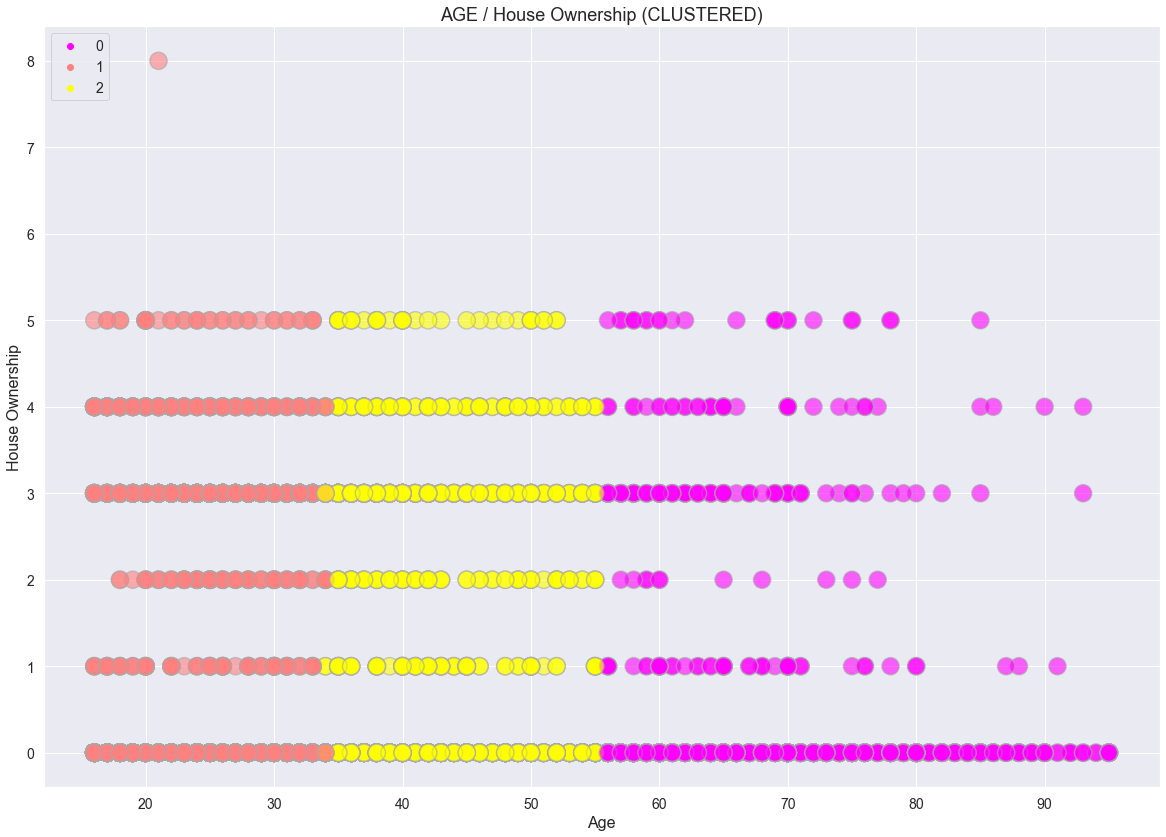

In [17]:
sns.set(rc={"figure.figsize":(20, 14)})

sns.scatterplot(x='Age', y='House_0ship', data = df,  s = 300,   hue = 'cluster_num',  palette = 'spring', alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('AGE / House Ownership (CLUSTERED)', fontsize = 18)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('House Ownership', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

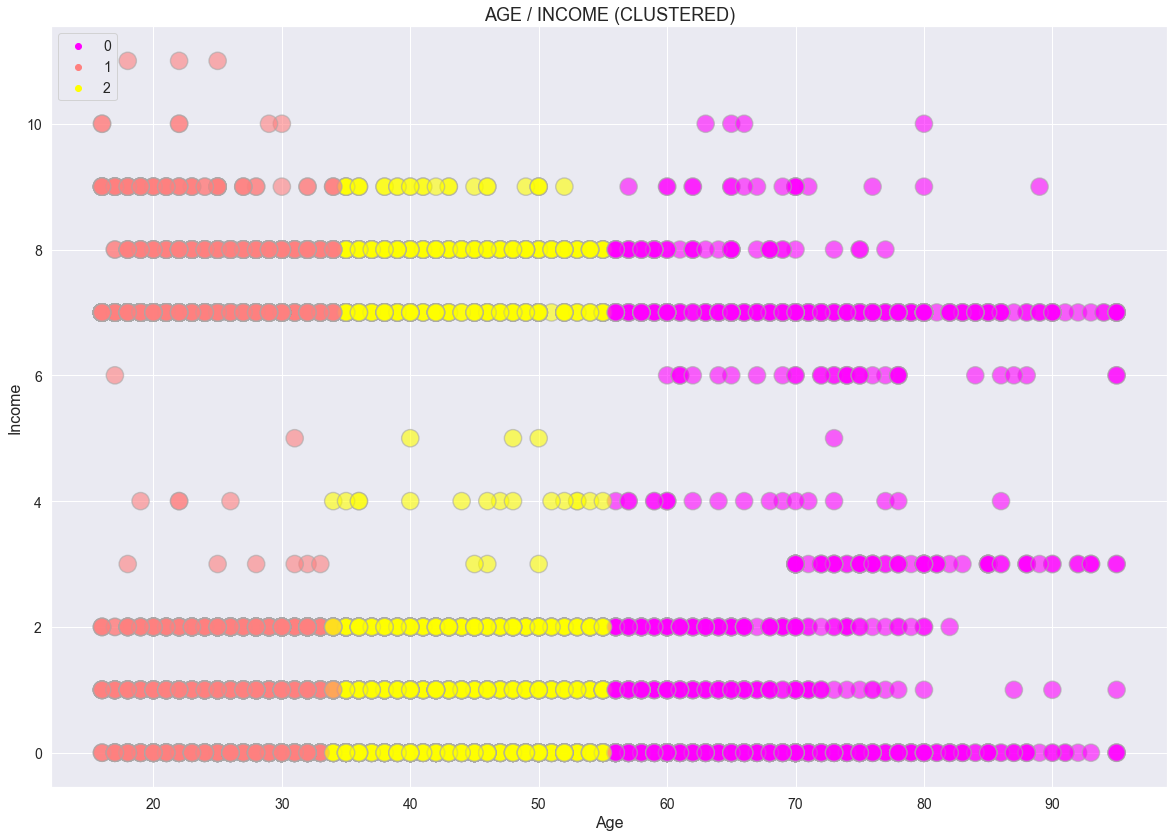

In [18]:
sns.set(rc={"figure.figsize":(20, 14)})

sns.scatterplot(x='Age', y='Income', data = df,  s = 300,   hue = 'cluster_num',  palette = 'spring', alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('AGE / INCOME (CLUSTERED)', fontsize = 18)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Income', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

<ipython-input-20-8d2cacbbec1a>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect = [75, 75, .95, 120], elev = 28, azim = 134)


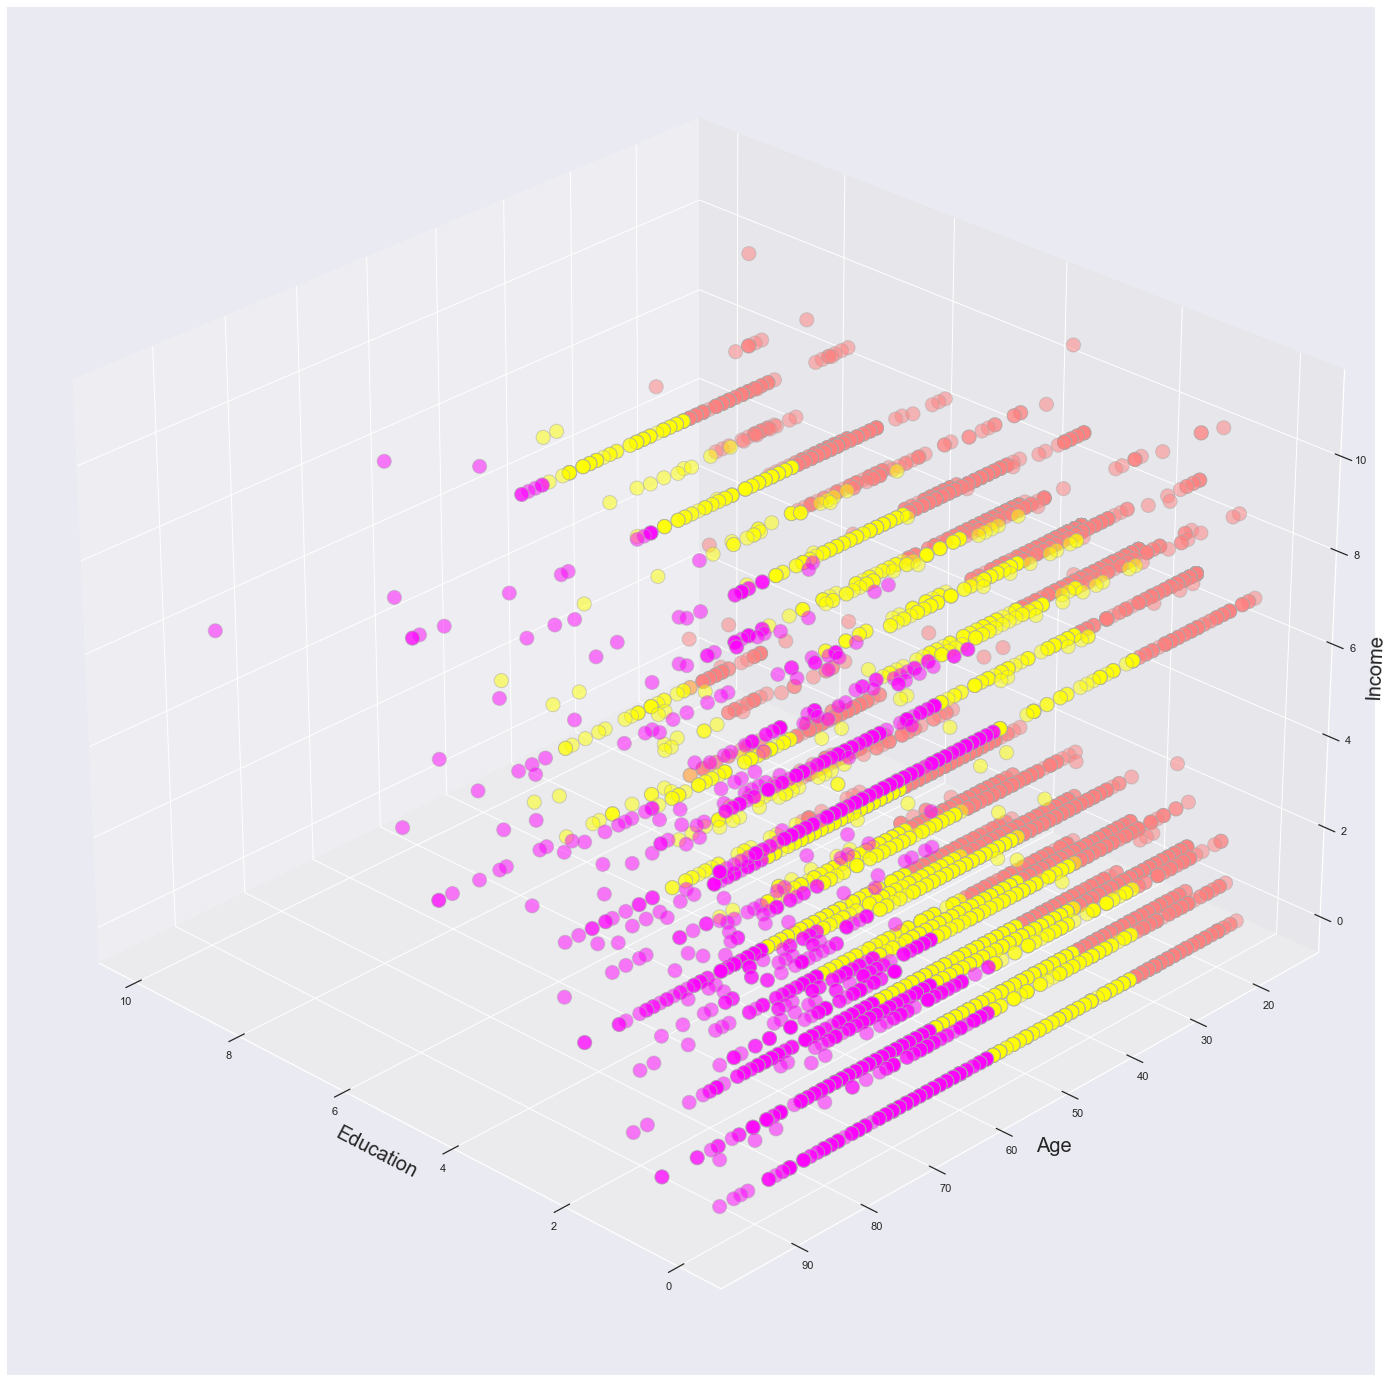

In [20]:
fig = plt.figure(1000)
plt.clf()
ax = Axes3D(fig, rect = [75, 75, .95, 120], elev = 28, azim = 134)
fig.add_axes(ax)
plt.cla()
ax.scatter(df['Education'], df['Age'], df['Income'], c = df['cluster_num'], s = 200, cmap = 'spring', alpha = 0.5, edgecolor = 'darkgrey')
ax.set_xlabel('Education', fontsize = 20)
ax.set_ylabel('Age', fontsize = 20)
ax.set_zlabel('Income', fontsize = 20)
plt.show()

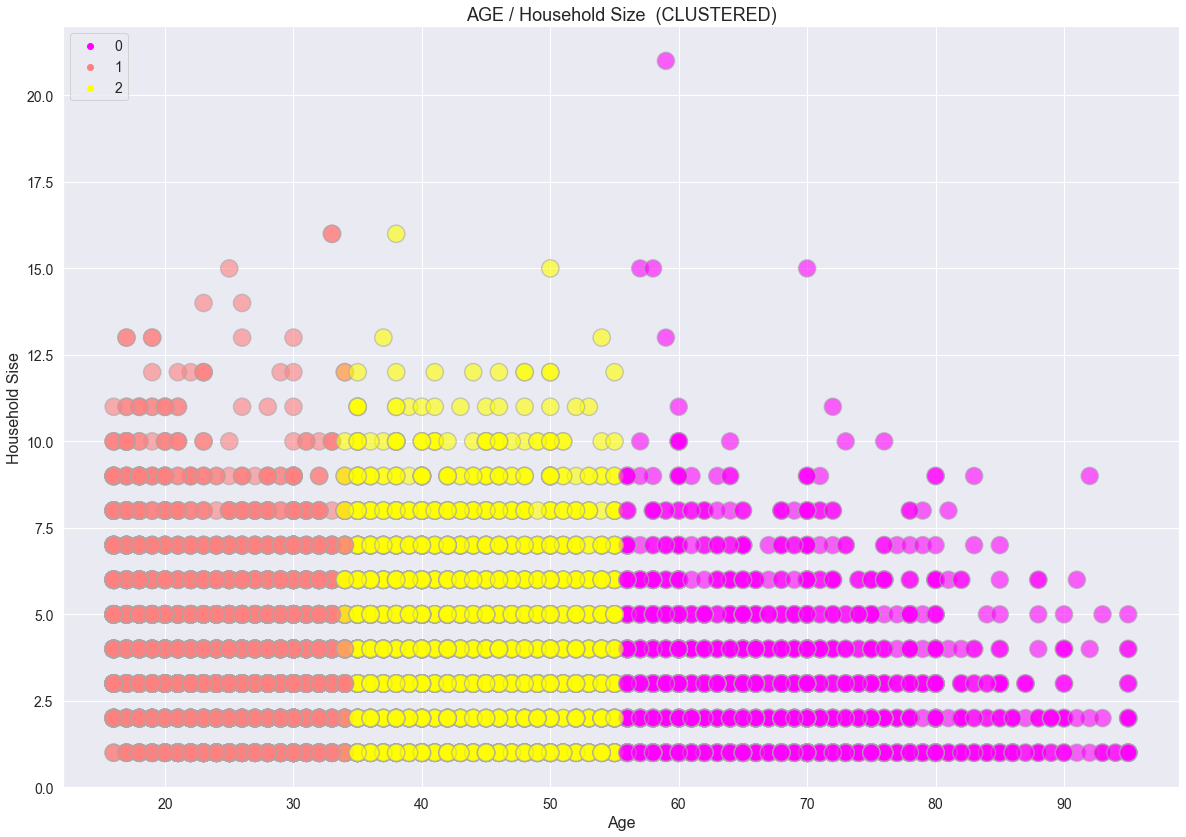

In [21]:
sns.set(rc={"figure.figsize":(20, 14)})

sns.scatterplot(x='Age', y='Household Size', data = df,  s = 300,   hue = 'cluster_num',  palette = 'spring', alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('AGE / Household Size  (CLUSTERED)', fontsize = 18)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Household Sise', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

# From the above it shows that the Population is a young to middle  aged population. The most productive age

In [22]:
df_1=df.groupby('cluster_num').mean()

C:\Users\tsigauke\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


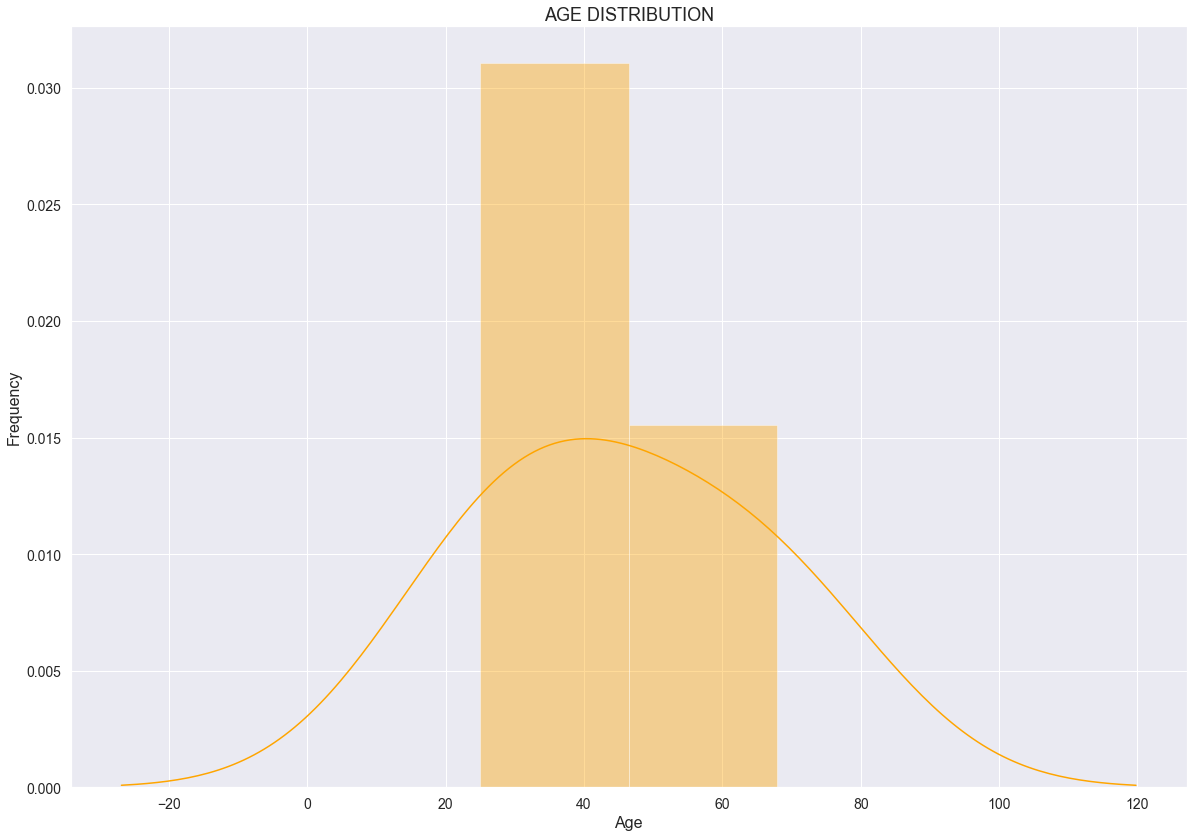

In [23]:
sns.distplot(df_1['Age'],color = 'orange')
plt.title('AGE DISTRIBUTION', fontsize = 18)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

<ipython-input-32-0a8bd765049c>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect = [75, 75, .95, 120], elev = 28, azim = 134)


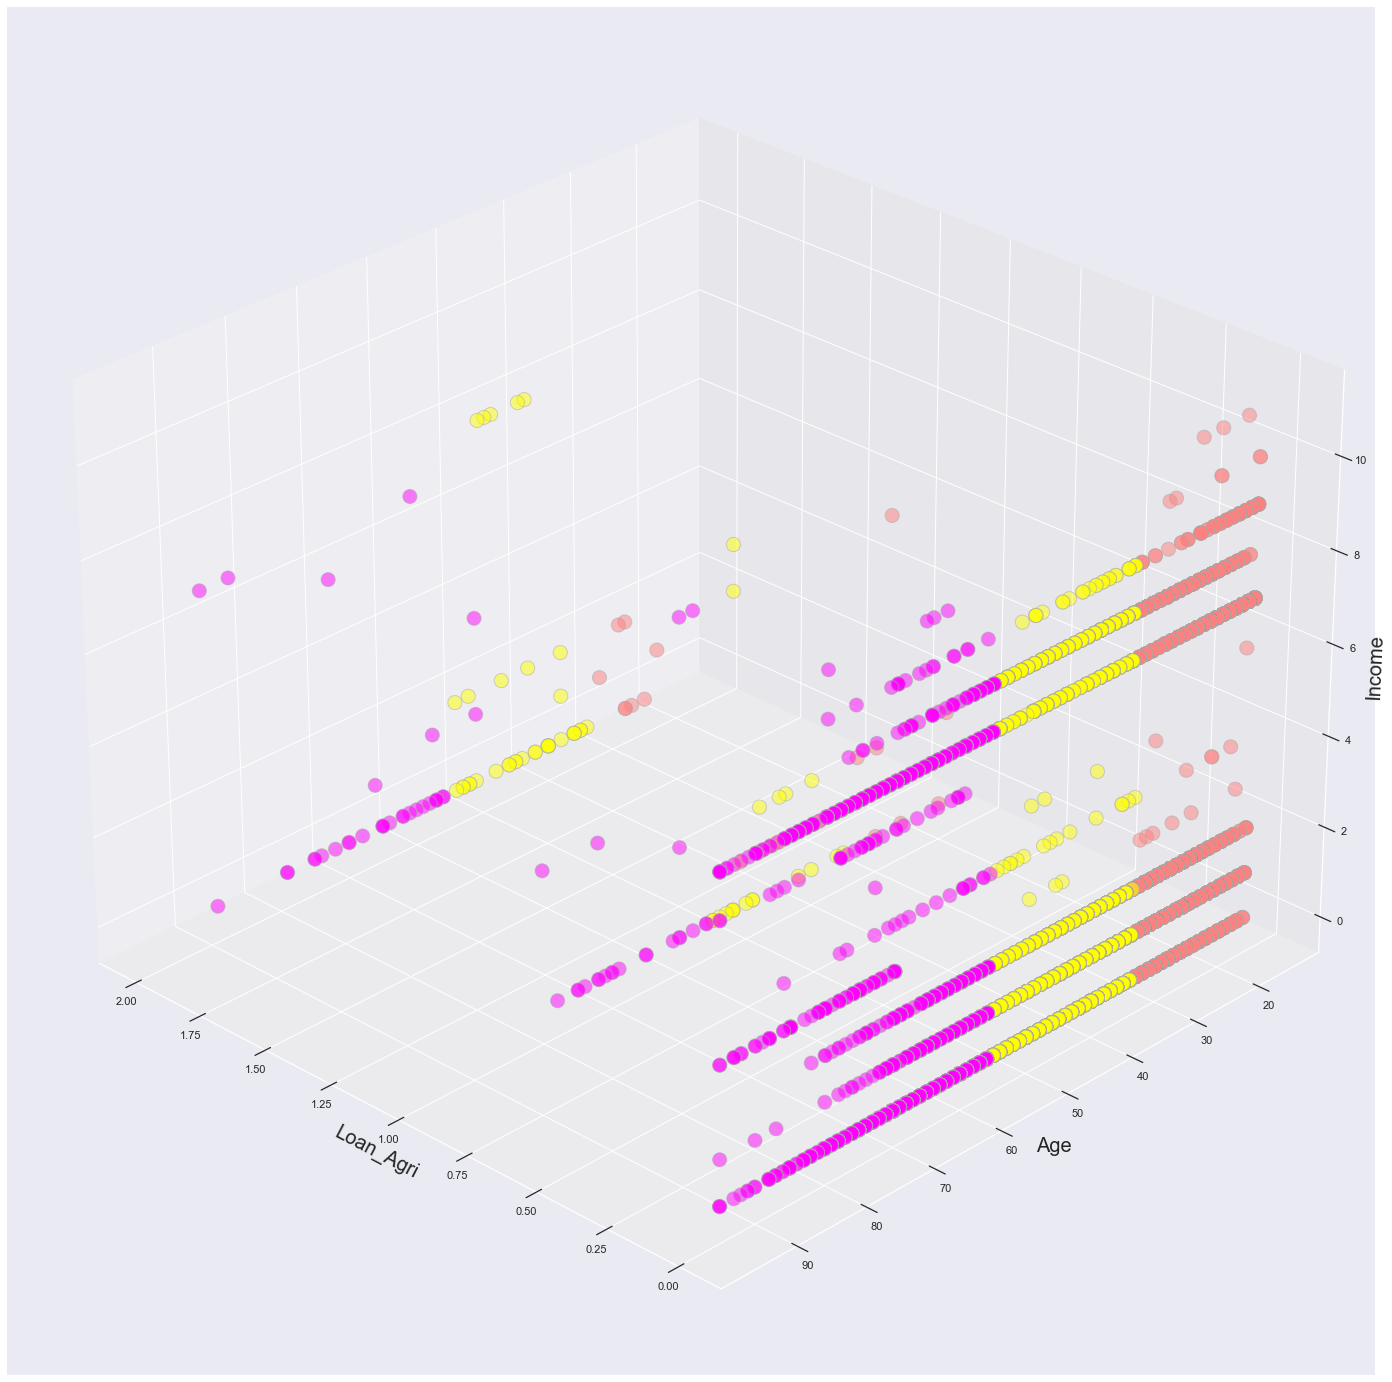

In [32]:
fig = plt.figure(1000)
plt.clf()
ax = Axes3D(fig, rect = [75, 75, .95, 120], elev = 28, azim = 134)
fig.add_axes(ax)
plt.cla()
ax.scatter(df['Loan_Agri'], df['Age'], df['Income'], c = df['cluster_num'], s = 200, cmap = 'spring', alpha = 0.5, edgecolor = 'darkgrey')
ax.set_xlabel('Loan_Agri', fontsize = 20)
ax.set_ylabel('Age', fontsize = 20)
ax.set_zlabel('Income', fontsize = 20)
plt.show()

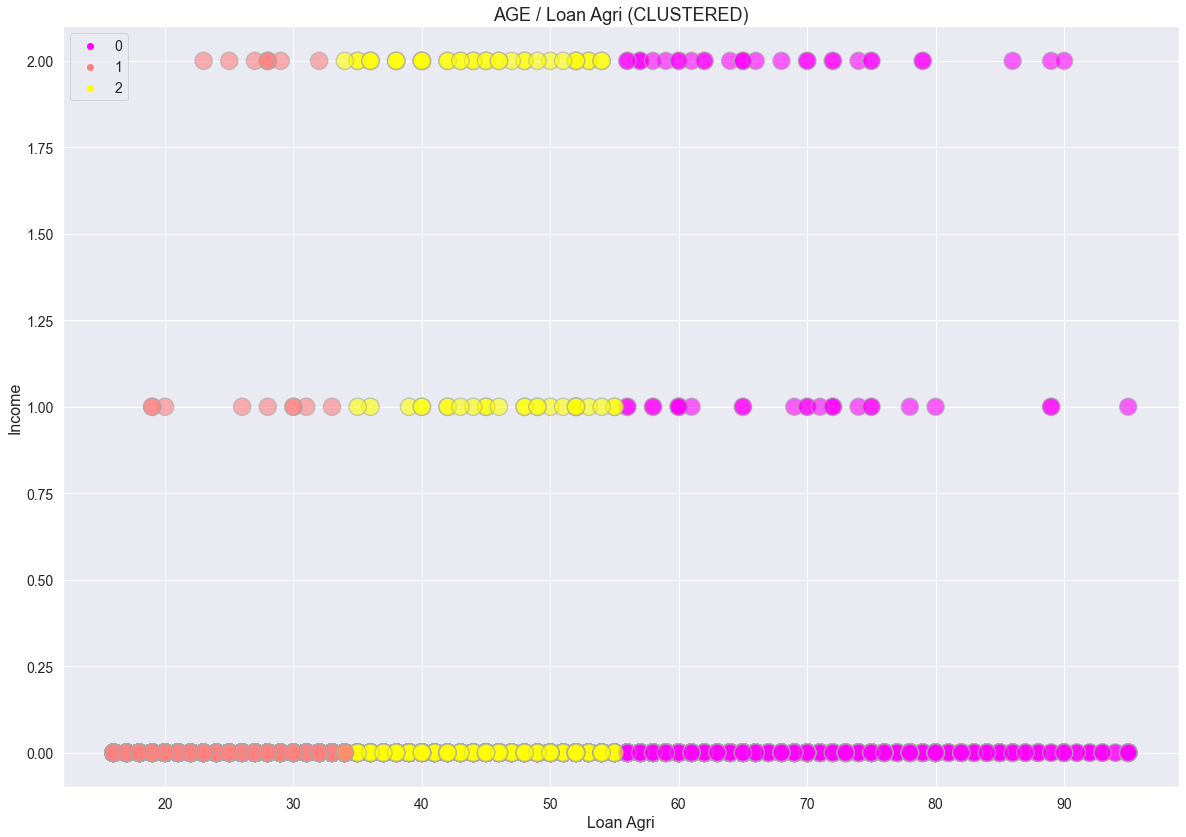

In [33]:
sns.set(rc={"figure.figsize":(20, 14)})

sns.scatterplot(x='Age', y='Loan_Agri', data = df,  s = 300,   hue = 'cluster_num',  palette = 'spring', alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('AGE / Loan Agri (CLUSTERED)', fontsize = 18)
plt.xlabel('Loan Agri', fontsize = 16)
plt.ylabel('Income', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)
plt.show()

# K-Means model has partitioned the popullation into mutually exclusive groups, which are three clusters in this case.

Affluent, Educated & Old Aged

Middle-Aged & Middle Income

Young & High Income

# The financially reachable' segments.which the government can target are Young and the middle aged.